In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import model_from_json

import heatmap_file
from heatmap_file import to_heatmap
from heatmap_file import synset_to_dfs_ids

In [156]:
def display_heatmap(new_model, img_path):

    img=mpimg.imread(img_path)
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15, 10)
    
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    print(x.shape)
    factor_rows = x.shape[1]
    factor_cols = x.shape[2]
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    out = new_model.predict(x)

    s = "n02512053" # Imagenet code for "fish"
    ids = synset_to_dfs_ids(s)
    heatmap_fish = out[0,ids].sum(axis=0)
    
    print(heatmap_fish.shape)
    
    factor_rows = factor_rows/heatmap_fish.shape[0]
    factor_cols = factor_cols/heatmap_fish.shape[1]
     
    ax[1].imshow(heatmap_fish, interpolation="none")
    binary = heatmap_fish>(np.max(heatmap_fish)-np.std(heatmap_fish))
    find_map = np.where(binary == 1)
   
    min_x = np.min(find_map[0])
    max_x = np.max(find_map[0])

    min_y = np.min(find_map[1])
    max_y = np.max(find_map[1])

    x_range = max_x - min_x
    y_range = max_y - min_y

    ax[2].imshow(binary, alpha=0.5)
    rect = patches.Rectangle((min_y-0.5,min_x-0.5),y_range+1,x_range+1,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax[2].add_patch(rect)
    rect2 = patches.Rectangle((min_y*factor_rows-0.5,min_x*factor_cols-0.5),y_range*factor_rows+1,x_range*factor_cols+1,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax[0].imshow(img)
    ax[0].add_patch(rect2)
    
    plt.show()

(array([0, 1, 1, 1, 2, 3]), array([2, 1, 2, 3, 2, 1]))
(0, 1)
(3, 3)


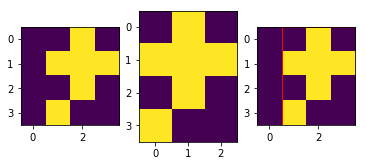

In [140]:
binary = np.array([[0, 0, 1, 0], [0, 1, 1, 1], [0, 0, 1, 0], [0, 1, 0, 0]])
find_map = np.where(binary == 1)
print(find_map)

min_x = np.min(find_map[0])
max_x = np.max(find_map[0])

min_y = np.min(find_map[1])
max_y = np.max(find_map[1])

x_range = max_x - min_x
y_range = max_y - min_y

print(min_x,min_y)
print(max_x,max_y)

#x_min = (x_stop[0][x1],x_stop[1][x1])
#x_max = (x_stop[0][x2],x_stop[1][x2])
#y_min = (x_stop[0][y1],x_stop[1][y1])
#y_max = (x_stop[0][y2],x_stop[1][y2])
#print(x_min)
#print(x_max)
#print(y_min)
#print(y_max)
fig, ax = plt.subplots(1,3)
ax[0].imshow(binary)
ax[1].imshow(binary[min_x:max_x+1,min_y:max_y+1])
ax[2].imshow(binary)
rect = patches.Rectangle((min_y-0.5,min_x-0.5),y_range+1,x_range+1,linewidth=1,edgecolor='r',facecolor='none')
ax[2].add_patch(rect)
plt.show()

## Let's try with a VGG16:

In [144]:
model = VGG19()
new_model = to_heatmap(model)

Model type detected: local pooling - flatten
Model cut at layer: 21
Pool size infered: 7


(3, 670, 1192)
(28, 61)


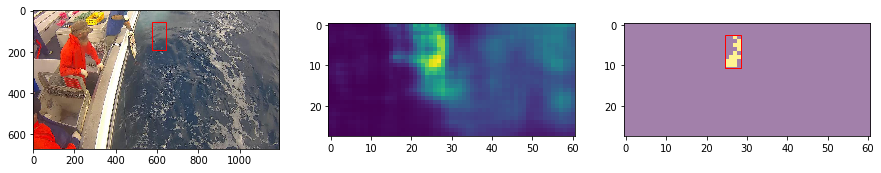

(3, 720, 1280)
(32, 67)


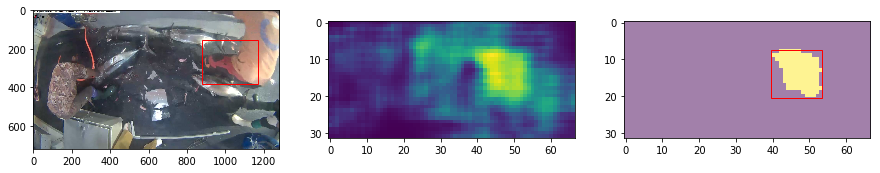

(3, 720, 1280)
(32, 67)


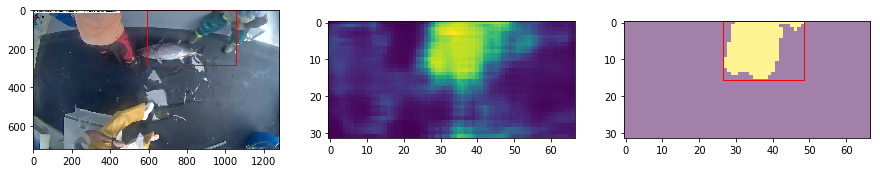

In [157]:
display_heatmap(new_model, "../data/train/ALB/img_00110.jpg")
display_heatmap(new_model, "../data/train/ALB/img_00003.jpg")
display_heatmap(new_model, "../data/train/ALB/img_00085.jpg")

## Now with a ResNet50:

In [21]:
model = ResNet50()
new_model = to_heatmap(model)

Model type detected: local pooling - flatten
Model cut at layer: 174
Pool size infered: 1


In [ ]:
display_heatmap(new_model, "../data/train/LAG/img_00176.jpg")
display_heatmap(new_model, "../data/train/ALB/img_00003.jpg")
display_heatmap(new_model, "../data/train/SHARK/img_00072.jpg")

## Now with a custom classifier:

Class 0 is "fish" and class 1 is "no fish"

In [23]:
# load json and create model
json_file = open('model_2c_10e_R50_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_2c_10e_R50_1.h5")
print("Loaded model from disk")

IOError: [Errno 2] No such file or directory: 'model_2c_10e_R50_1.json'

In [ ]:
new_model = to_heatmap(model, input_shape=(3,256,256))

In [ ]:
def display_heatmap(new_model, img_path):

    plt.figure()
    img=mpimg.imread(img_path)
    plt.subplot(121)
    plt.imshow(img)
    
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    out = new_model.predict(x)

    heatmap_fish = out[0,[0]].sum(axis=0)
    plt.subplot(122)
    plt.imshow(heatmap_fish, interpolation="none")
    plt.show()

In [ ]:
display_heatmap(new_model, "../data/train/LAG/img_00176.jpg")
display_heatmap(new_model, "../data/train/ALB/img_00003.jpg")
display_heatmap(new_model, "../data/train/SHARK/img_00072.jpg")

## Now with the InceptionV3:

It's buggy and I don't know why. If someone could figure it out, it'd be great.

In [ ]:
model = InceptionV3()
new_model = to_heatmap(model)

In [ ]:
import cv2
print cv2.__version__

def display_heatmap(new_model, img_path):

    plt.figure()
    img=cv2.imread(img_path)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2)
    #cnt = contours[0]
    #M = cv2.moments(cnt)
    #print M
    #rect = cv2.minAreaRect(cnt)
    #box = cv2.boxPoints(rect)
    #box = np.int0(box)
    #cv2.drawContours(img,[box],0,(0,0,255),2)
    plt.subplot(121)
    plt.imshow(img)
    
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    out = new_model.predict(x)

    s = "n02512053" # Imagenet code for "fish"
    ids = synset_to_dfs_ids(s)
    heatmap_fish = out[0,ids].sum(axis=0)
    plt.subplot(122)
    plt.imshow(heatmap_fish, interpolation="none")
    plt.show()

In [ ]:
display_heatmap(new_model, "../data/train/LAG/img_00176.jpg")
display_heatmap(new_model, "../data/train/ALB/img_00003.jpg")
display_heatmap(new_model, "../data/train/SHARK/img_00072.jpg")

Bounding boxes

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),2)

Don't hesitate to contribute!